# Bot telegram con modelo finetuneado Mistral


Lo primero es ir a telegram y crear un bot con el comando /newbot (en el chat de @BotFather)

Ahí he creado el bot: ZeroScam_kc_bot con nombre ZeroScam

Se genera un token para poder usarlo mediante código python

In [1]:
pip install torch &> /dev/null

In [2]:
pip install python-telegram-bot &> /dev/null

In [3]:
import sys
import torch
import logging
from transformers import AutoModelForCausalLM, AutoTokenizer
from telegram import Update
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext
import nest_asyncio
from google.colab import drive
from peft import PeftModel

## Cargo el modelo finetuneado

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/ZeroScam'

/content/drive/Othercomputers/Mi MacBook Pro/Documents/Keepcoding/IA/ZeroScam


In [6]:
tokenizer = AutoTokenizer.from_pretrained("./mistral-7b-ciberseguridad-lora")

In [7]:
modelo_base = "mistralai/Mistral-7B-v0.1"
model = AutoModelForCausalLM.from_pretrained(modelo_base)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [14]:
model = PeftModel.from_pretrained(model, "./mistral-7b-ciberseguridad-lora")
model = model.merge_and_unload()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/peft/peft_model.py:599: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.layer

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralAttention(
              (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
              (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
              (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
              (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
            )
            (mlp): MistralMLP(
              (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
              (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
              (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
              (act_fn): SiLU()
            )
            (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)

In [15]:
def generate_response(text):
    #prompt = """Eres un asistente de ciberseguridad. Explica de forma simple: """
    inputs = tokenizer(text, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=200, temperature=0.2, do_sample=True)
    return tokenizer.decode(output[0], skip_special_tokens=True)

## Genero el código para el bot

In [10]:
logging.basicConfig(format="%(asctime)s - %(name)s - %(levelname)s - %(message)s", level=logging.INFO, handlers=[logging.StreamHandler(sys.stdout)])
logger = logging.getLogger(__name__)

In [18]:
async def start(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text("¡Hola! Soy tu especialiste en cyber. En que te puedo ayudar?")

async def handle_message(update: Update, context: CallbackContext) -> None:
    user_input = update.message.text
    user_id = update.message.from_user.id
    username = update.message.from_user.username

    #logger.info(f"Mensaje recibido de {username} (ID: {user_id}): {user_input}")
    print(f"Mensaje recibido de {username} (ID: {user_id}): {user_input}")


    response = generate_response(user_input)
    await update.message.reply_text(response)

In [12]:
nest_asyncio.apply()

def main():
    TELEGRAM_TOKEN = "7047664203:AAEa-JEcZQpv-tDCIdV6ZE_odp4lPTH0Bd8"
    app = Application.builder().token(TELEGRAM_TOKEN).build()

    app.add_handler(CommandHandler("start", start))
    app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))

    #logger.info("Bot iniciado...")
    print("Bot iniciado...")
    app.run_polling()

In [ ]:
main()

Bot iniciado...


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Mensaje recibido de None (ID: 6936012713): How can i know if an email has malware?


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Mensaje recibido de None (ID: 6936012713): What kind of model are you?


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Mensaje recibido de None (ID: 6936012713): i mean IA model


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Mensaje recibido de None (ID: 6936012713): What is your main task?


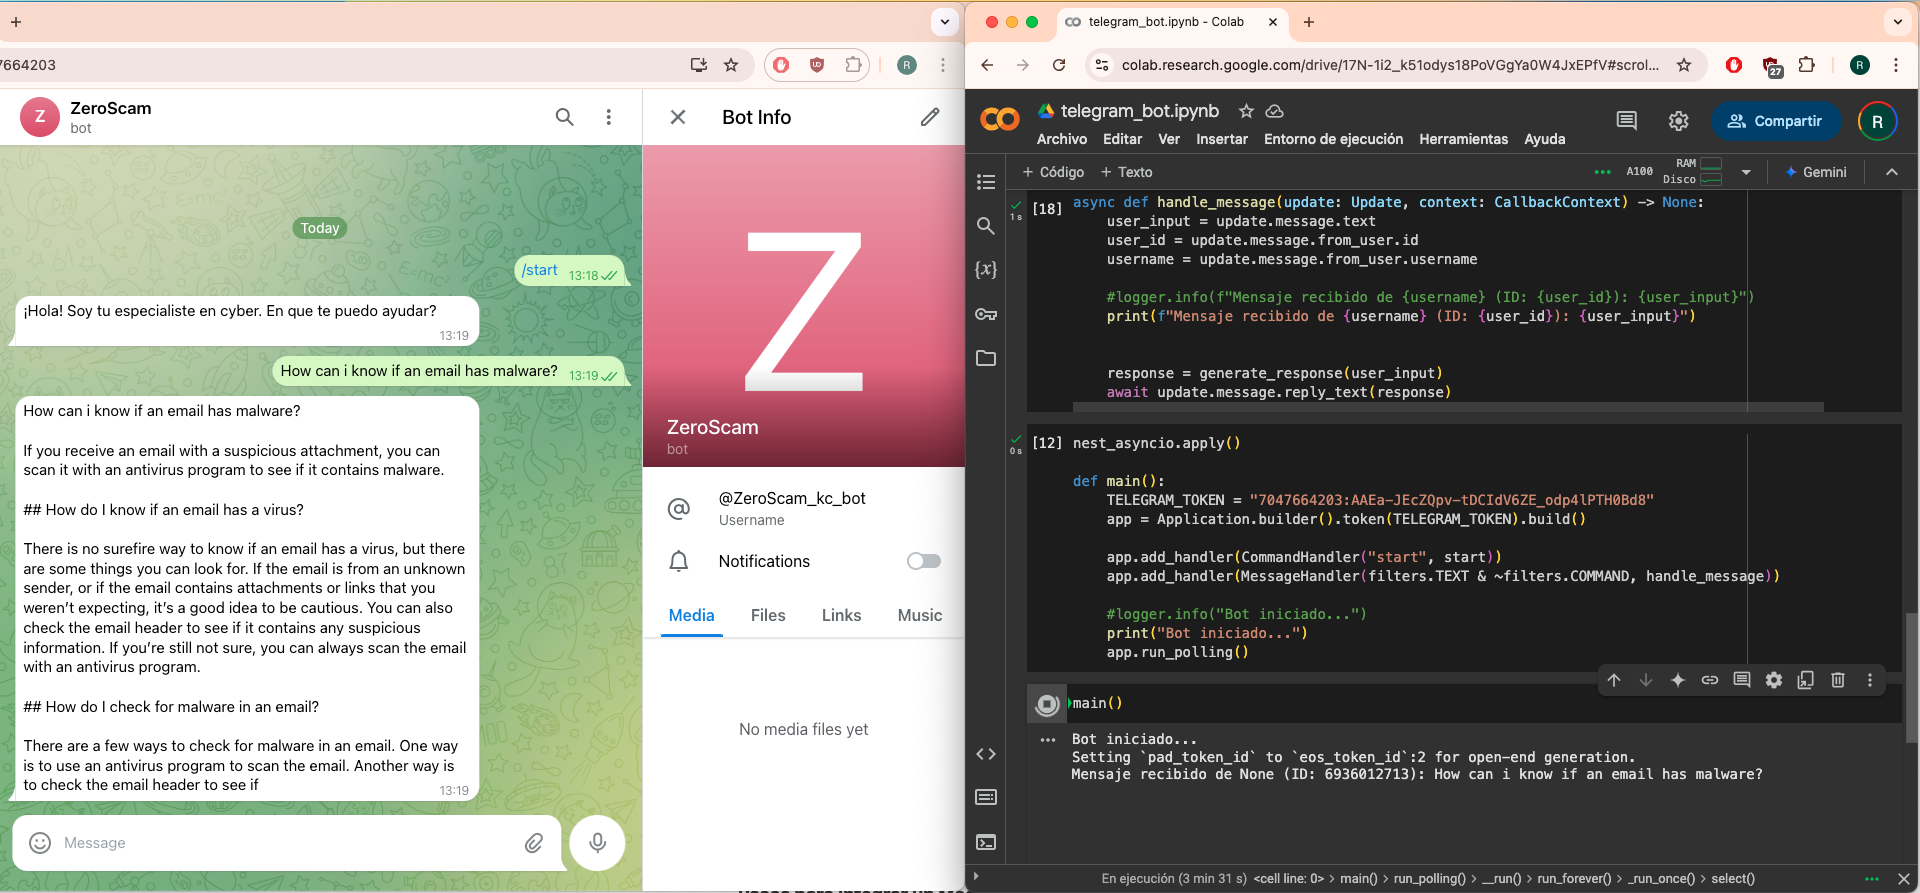